In [488]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

In [489]:
data = pd.read_csv("Heart Attack.csv")
data

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [490]:
data.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [491]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [492]:
data.duplicated().sum()

np.int64(0)

In [493]:
data.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [494]:
data['gender'].unique()

array([1, 0])

In [495]:
mapping_data = {"negative":0 , "positive":1}
data["Sick"]=data["class"].map(mapping_data)
data

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class,Sick
0,64,1,66,160,83,160.0,1.80,0.012,negative,0
1,21,1,94,98,46,296.0,6.75,1.060,positive,1
2,55,1,64,160,77,270.0,1.99,0.003,negative,0
3,64,1,70,120,55,270.0,13.87,0.122,positive,1
4,55,1,64,112,65,300.0,1.08,0.003,negative,0
...,...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative,0
1315,66,1,84,125,55,149.0,1.33,0.172,positive,1
1316,45,1,85,168,104,96.0,1.24,4.250,positive,1
1317,54,1,58,117,68,443.0,5.80,0.359,positive,1


In [496]:
data.drop("class",inplace=True,axis=1)
data

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,Sick
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,0
1315,66,1,84,125,55,149.0,1.33,0.172,1
1316,45,1,85,168,104,96.0,1.24,4.250,1
1317,54,1,58,117,68,443.0,5.80,0.359,1


In [497]:
data.columns

Index(['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose',
       'kcm', 'troponin', 'Sick'],
      dtype='object')

In [498]:
data["Sick"].value_counts()

Sick
1    810
0    509
Name: count, dtype: int64

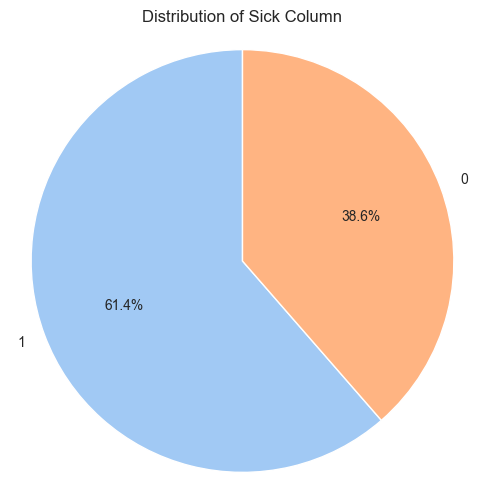

In [499]:

value_counts = data["Sick"].value_counts()

sns.set_style("whitegrid")
colors = sns.color_palette("pastel")

plt.figure(figsize=(6,6))
plt.pie(value_counts.values,labels=value_counts.index, colors=colors,autopct='%1.1f%%',startangle=90)

plt.title("Distribution of Sick Column")
plt.axis('equal')  
plt.show()


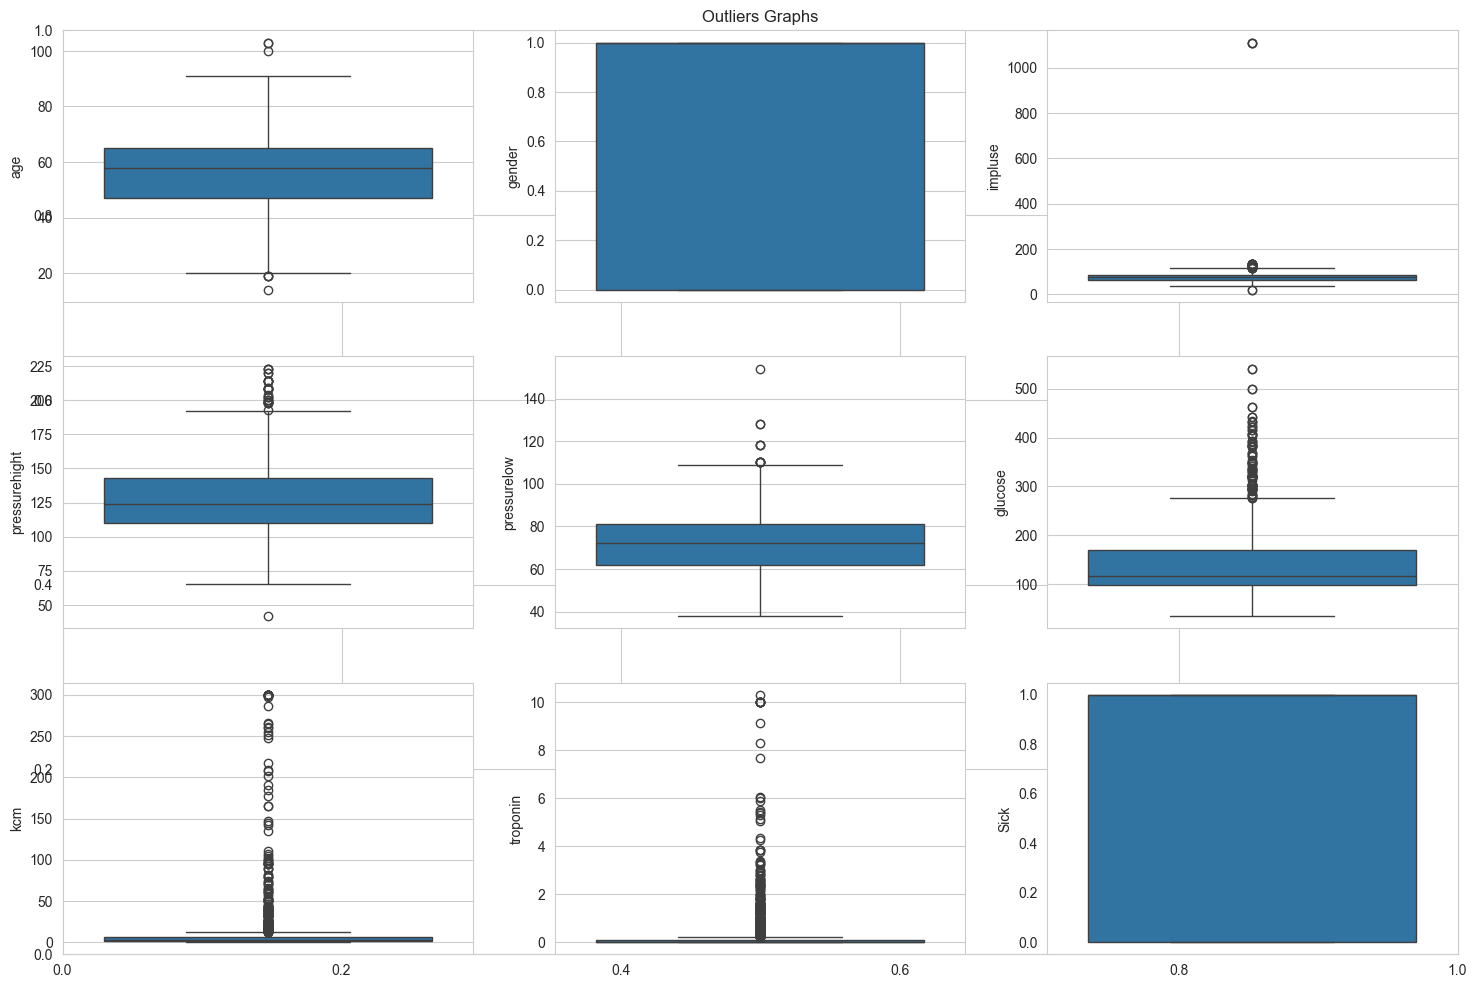

In [500]:
plt.figure(figsize=(18,12))
plt.title("Outliers Graphs")

for i,column in enumerate(data.select_dtypes(exclude="category"),start=1):
    plt.subplot(3,3,i)
    sns.boxplot(data[column])

plt.grid(visible=False)
plt.show()


In [501]:
Columns_Scalers = {}
for column in ['age', 'impluse','pressurehight','pressurelow','glucose','kcm']:
    scaler = StandardScaler()
    data[column]  = scaler.fit_transform(data[[column]])
    Columns_Scalers[column] = scaler


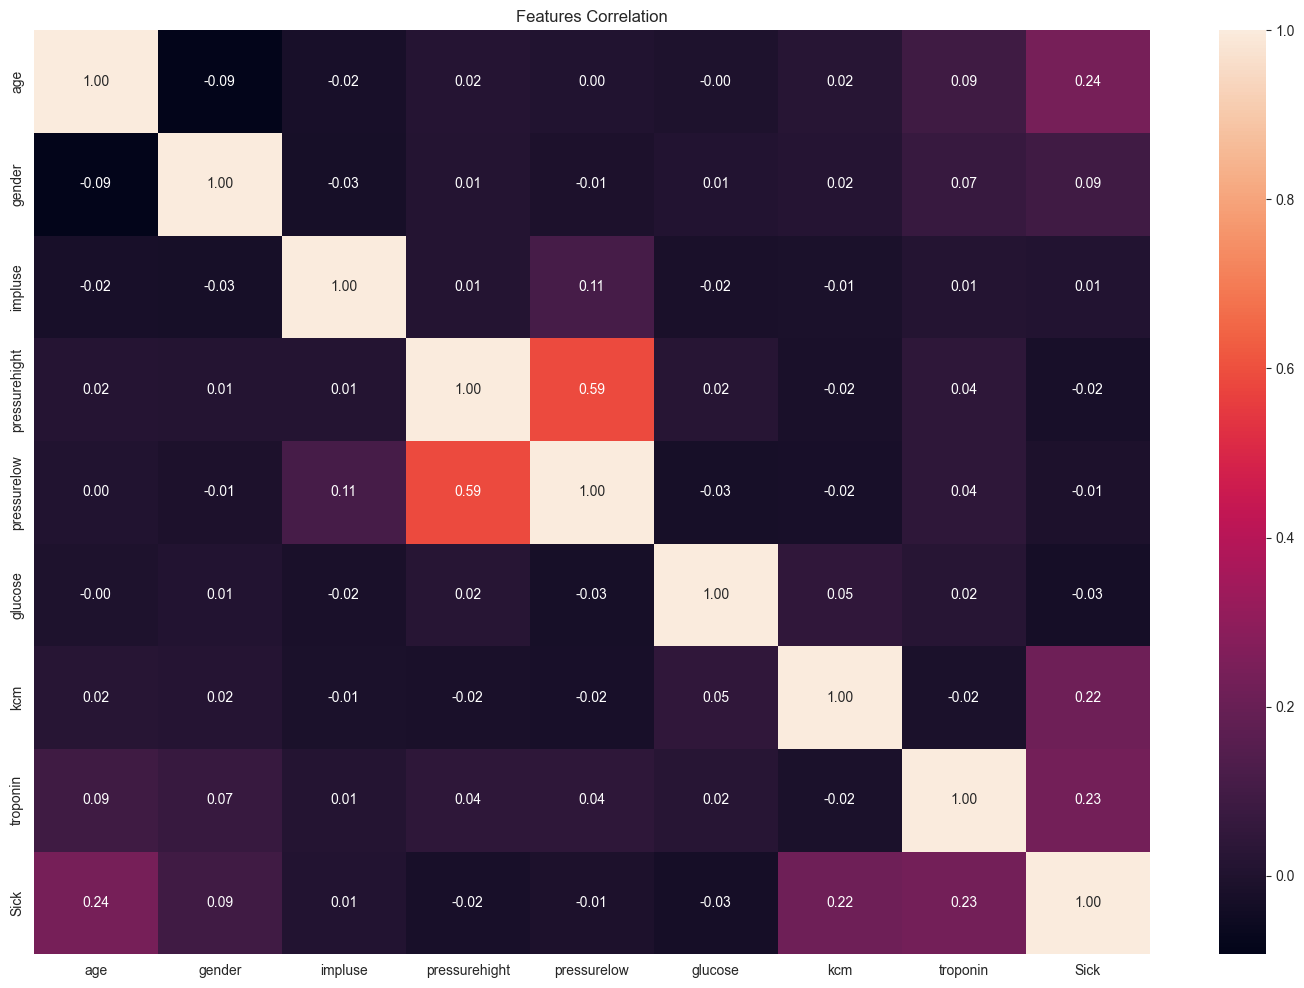

In [502]:
corr = data.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr,annot=True,fmt=".2f")
plt.title("Features Correlation")
plt.show()

In [503]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [504]:
x_train , x_test , y_train , y_test = train_test_split(x,y,shuffle=False,test_size=0.2,random_state=42)

In [505]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import numpy as np


In [506]:
classweights = compute_class_weight(classes=np.unique(y),class_weight="balanced",y=y)
classweights = dict(zip(np.unique(y), classweights))
classweights

{np.int64(0): np.float64(1.2956777996070727),
 np.int64(1): np.float64(0.8141975308641975)}

In [507]:
classifier = RandomForestClassifier(n_estimators=4,random_state=42,class_weight=classweights)
classifier.fit(x_train,y_train)
y_predict = classifier.predict(x_test)
accuracy = accuracy_score(y_test,y_predict)
accuracy*100


98.86363636363636

In [508]:
classifier = LogisticRegression(random_state=42,C=1,class_weight=classweights)
classifier.fit(x_train,y_train)
y_predict = classifier.predict(x_test)
accuracy = accuracy_score(y_test,y_predict)
accuracy*100


75.75757575757575

In [509]:
classifier = SVC(random_state=42,C=1,class_weight=classweights)
classifier.fit(x_train,y_train)
y_predict = classifier.predict(x_test)
accuracy = accuracy_score(y_test,y_predict)
accuracy*100


71.21212121212122

In [510]:
classifier = DecisionTreeClassifier(random_state=42,class_weight=classweights)
classifier.fit(x_train,y_train)
y_predict = classifier.predict(x_test)
accuracy = accuracy_score(y_test,y_predict)
accuracy*100


99.62121212121212

In [511]:
test = pd.DataFrame({"age":[64],"gender":[1],"impluse":[66],"pressurehight":[160],"pressurelow":[83],"glucose":[160.0],"kcm":[1.80],"troponin":[0.012]})
classifier.predict(test)

array([1])

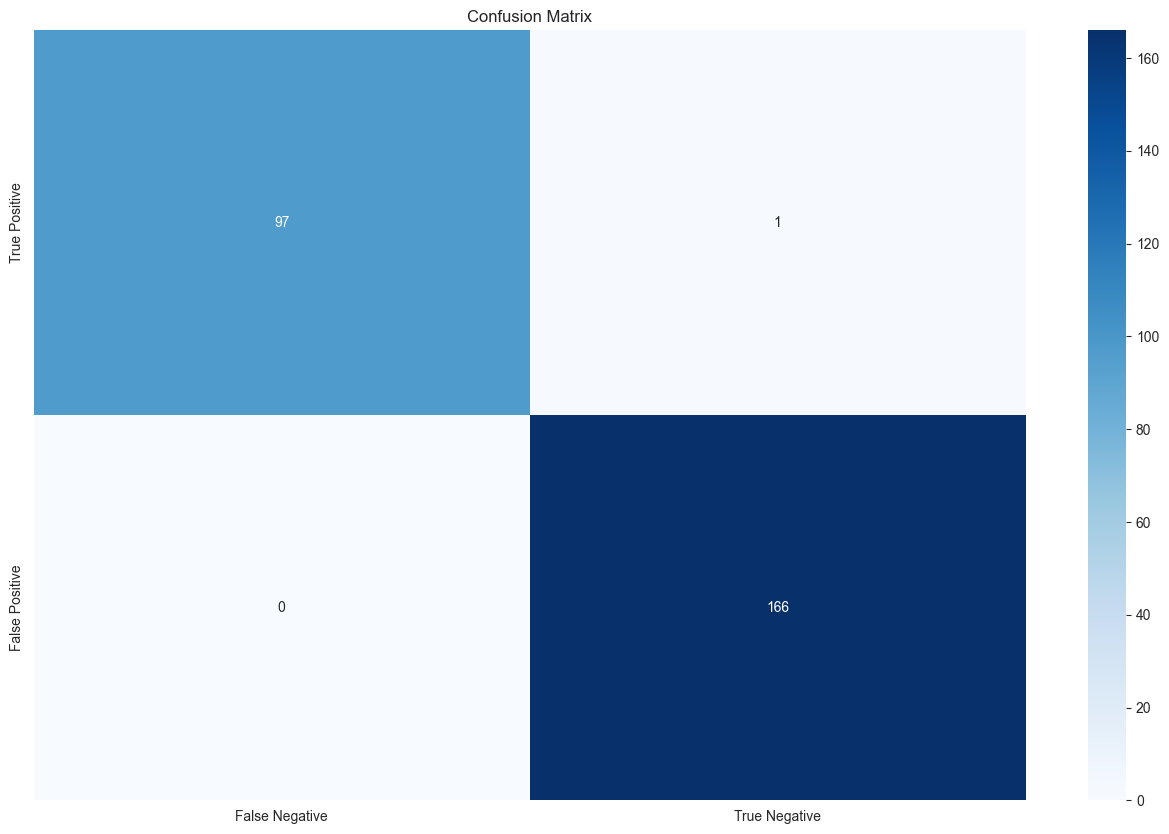

In [512]:
acc = confusion_matrix(y_test,y_predict)
plt.figure(figsize=(16,10))
plt.title("Confusion Matrix")
sns.heatmap(acc,xticklabels=["False Negative","True Negative"],yticklabels=["True Positive","False Positive"],annot=True,cmap="Blues",fmt=f".0f")
plt.show()